# EDA and Modeling

Performed Exploratory Data Analysis in order to better understand the data and how certain features correlate with each other and with the target variable. Then, built machine learning models (Baseline Classifier, KNN, Logistic Regression, Decision Tree, Random Forest, Voting Classifier and XGBoost) to predict how a rookie will perform in the NBA and assessed which model provided the best predictions. Also evaluated model by looking at how well it predicts the 2018 NBA Draft Class.

# EDA

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('nba_df.csv')

In [3]:
df['Tier'].value_counts()

1    375
0    304
2    254
3     80
Name: Tier, dtype: int64

In [4]:
df = df.drop('Unnamed: 0', 1)

In [5]:
df.corr()

,StartYear,EndYear,NBA_Tenure,Ht,Wt,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier,Undersized,Conference
StartYear,1.000000,0.880000,-0.259667,0.015902,0.155357,-0.039203,-0.033215,-0.032611,-0.204450,-0.002902,0.008811,-0.069383,-0.067370,0.160636,-0.011633,-0.041521,-0.150027,-0.360755,0.291141,-0.174740,-0.333446,-0.258343,-0.166766,-0.347895,-0.350309,-0.081163,0.051636,0.080048,0.041323,-0.115190,-0.126449,-0.001827,-0.072668,-0.071642,-0.189506,-0.000190,-0.215995,-0.263791,0.034446,-0.052678,-0.074031,0.130674
EndYear,0.880000,1.000000,0.230175,0.026291,0.160084,0.144123,0.095277,0.084220,0.258708,0.307785,0.276727,0.172736,0.100067,0.302072,0.146309,0.201661,0.229074,-0.411809,0.313784,-0.137942,-0.264299,-0.215335,-0.110431,-0.280196,-0.300141,-0.015850,0.048831,0.076630,0.073910,-0.075394,-0.086196,0.004314,-0.021098,-0.032805,-0.102120,0.049173,-0.179350,-0.202394,0.082347,0.287177,-0.062170,0.165599
NBA_Tenure,-0.259667,0.230175,1.000000,0.020873,0.007174,0.373346,0.261766,0.238047,0.944883,0.631722,0.544579,0.493355,0.341483,0.285042,0.321304,0.495080,0.773127,-0.098142,0.041471,0.077556,0.145817,0.091494,0.117153,0.143100,0.107496,0.134065,-0.006512,-0.008205,0.065605,0.082719,0.083823,0.012513,0.105991,0.080086,0.180643,0.100366,0.077893,0.128969,0.096850,0.691806,0.025276,0.068957
Ht,0.015902,0.026291,0.020873,1.000000,0.803538,-0.018525,-0.016710,0.016074,0.006451,-0.047839,0.430497,-0.511088,0.244601,-0.321016,-0.238310,0.051555,0.008588,-0.028422,-0.061981,-0.361899,-0.022996,-0.237989,0.510178,0.322706,0.235661,0.377202,-0.592165,-0.605598,-0.247366,-0.064337,0.061790,-0.349861,0.683120,-0.697024,-0.530336,0.623570,-0.257660,-0.165671,0.006175,0.044215,-0.434324,0.014560
Wt,0.155357,0.160084,0.007174,0.803538,1.000000,0.003793,-0.010044,0.002925,0.005536,-0.013592,0.457986,-0.421377,0.251707,-0.305478,-0.233286,0.089372,0.010224,-0.067587,-0.018080,-0.373609,-0.056759,-0.263351,0.496324,0.282874,0.194656,0.359694,-0.578275,-0.590095,-0.285040,-0.017537,0.115907,-0.374706,0.654333,-0.617127,-0.514203,0.534369,-0.204556,-0.172748,0.027202,0.075232,-0.217306,0.060570
All_Star_apps,-0.039203,0.144123,0.373346,-0.018525,0.003793,1.000000,0.865713,0.520409,0.427009,0.587440,0.391172,0.481343,0.131514,0.134782,0.141260,0.417754,0.735794,-0.134957,0.052224,0.058362,0.110341,0.076693,0.074461,0.092606,0.063059,0.098686,0.024464,0.026656,0.050715,0.122395,0.137608,-0.006726,0.091008,0.097932,0.134564,0.084196,0.080773,0.122678,0.019790,0.532839,0.015910,0.049788
All_NBA_apps,-0.033215,0.095277,0.261766,-0.016710,-0.010044,0.865713,1.000000,0.572188,0.301832,0.440477,0.277752,0.393274,0.091876,0.096232,0.101205,0.330833,0.606253,-0.067593,0.034424,0.078801,0.099854,0.075766,0.043263,0.075080,0.051118,0.067909,0.037452,0.039895,0.064101,0.110346,0.125701,0.001833,0.073145,0.106227,0.115227,0.067534,0.096231,0.114248,-0.003600,0.362530,0.001935,0.021074
All_Def_apps,-0.032611,0.084220,0.238047,0.016074,0.002925,0.520409,0.572188,1.000000,0.269057,0.225926,0.260956,0.241446,0.075263,0.032726,0.043225,0.211752,0.463826,-0.049228,0.010766,0.055861,0.027572,0.005737,0.040068,0.046229,0.027901,0.048534,-0.034342,-0.026419,0.045915,0.021826,0.051929,-0.065010,0.096136,0.087193,0.118913,0.115172,0.044064,0.019603,0.012843,0.244577,0.044373,0.007083
NBA_GP,-0.204450,0.258708,0.944883,0.006451,0.005536,0.427009,0.301832,0.269057,1.000000,0.707369,0.588911,0.548664,0.335746,0.300286,0.330709,0.524706,0.850804,-0.133330,0.080996,0.095360,0.159888,0.108275,0.107121,0.143786,0.109102,0.134568,0.015334,0.012868,0.087547,0.090682,0.091446,0.015163,0.105731,0.092134,0.201248,0.078907,0.074343,0.146195,0.093717,0.715740,0.022446,0.086368
NBA_PPG,-0.002902,0.307785,0.63172

[Text(0, 0, 'Bust'),
 Text(0, 0, 'Role Player'),
 Text(0, 0, 'Starter'),
 Text(0, 0, 'All-Star')]

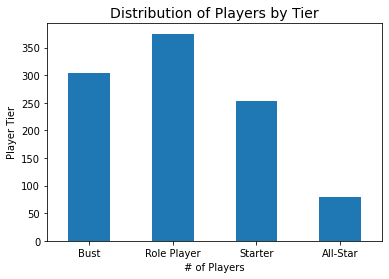

In [6]:
#Value count for each player tier
ax = df['Tier_Cat'].value_counts().reindex(["Bust","Role Player", "Starter", "All-Star"]).plot(kind="bar")
ax.set_xlabel("# of Players", fontsize=10)
ax.set_ylabel("Player Tier", fontsize=10)
ax.set_title("Distribution of Players by Tier", fontsize=14)
ax.set_xticklabels(["Bust", "Role Player", "Starter", "All-Star"], rotation=0)

In [7]:
df_per = df[~(df['NBA_PER'] >= 28.50)]
df_per = df[~(df['NBA_PER'] <= -10.00)]

Text(0.5, 1.0, 'Distribution of Players by PER')

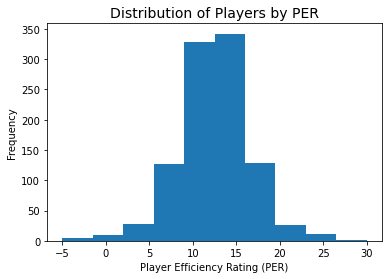

In [8]:
#distribution of PER
ax = df_per['NBA_PER'].plot.hist(bins=10, range=[-5, 30])
ax.set_xlabel("Player Efficiency Rating (PER)", fontsize=10)
ax.set_title("Distribution of Players by PER", fontsize=14)

In [9]:
#Create visualizations to look at difference in means between categories
category_df = df.groupby(df['Tier_Cat']).mean()
category_df

,StartYear,EndYear,NBA_Tenure,Ht,Wt,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Tier,Undersized,Conference
Tier_Cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
All-Star,2001.662500,2013.175000,12.512500,78.016774,215.198470,4.550000,2.437500,1.175000,820.137500,17.706250,5.823750,4.276250,46.257500,32.628750,79.173750,19.103750,81.252500,2.575000,33.537500,32.702500,6.582500,13.105000,0.507912,5.367500,9.810000,0.545200,1.218750,3.303750,0.358263,4.165000,5.621250,0.735725,6.987500,3.271250,1.576250,1.037500,2.581250,18.547500,7.268625,3.0,0.200000,0.775000
Bust,2003.085526,2004.828947,2.743421,78.082305,210.998088,0.000000,0.000000,0.000000,80.976974,3.162500,1.452961,0.788158,37.613487,19.634868,63.397697,8.163158,0.570724,3.444079,31.680921,32.336184,5.900000,12.379934,0.478819,4.648355,9.044079,0.512280,1.252961,3.338158,0.329437,3.627303,4.916447,0.736865,5.971711,2.801974,1.278947,0.732566,2.492434,16.673026,6.069342,0.0,0.161184,0.625000
Role Player,2002.304000,2008.949333,7.645333,78.074583,212.454820,0.002667,0.000000,0.029333,390.485333,6.761067,2.784267,1.541333,43.412800,28.425867,73.601867,11.947467,12.451733,3.266667,32.797333,32.481867,6.057867,12.464800,0.489429,4.803467,9.171467,0.521856,1.251467,3.294933,0.335179,3.723467,4.980267,0.745901,6.238933,2.820000,1.350933,0.821600,2.442667,17.084533,6.954560,1.0,0.192000,0.685333
Starter,2001.877953,2010.909449,10.031496,78.751050,216.469381,0.169291,0.007874,0.161417,598.370079,10.680709,4.433858,2.338583,46.715354,27.812992,74.984646,15.597244,34.310236,2.976378,32.464567,32.429528,6.456299,12.801181,0.507870,5.423228,10.048031,0.539220,1.027953,2.753937,0.332862,4.063386,5.502362,0.735409,7.066142,2.794094,1.397638,1.072441,2.526378,17.994882,6.698228,2.0,0.192913,0.669291


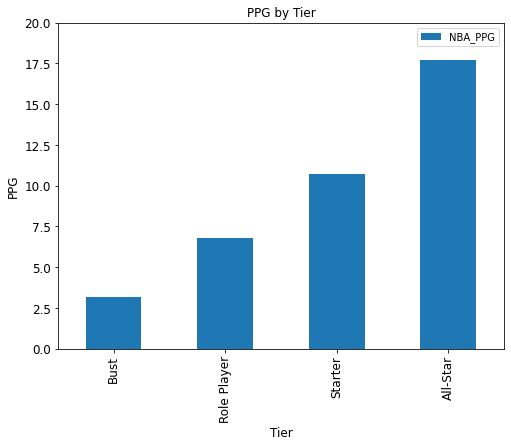

In [10]:
#visualization of ppg by tier category
ax = category_df[['NBA_PPG']].reindex(["Bust", "Role Player", "Starter", "All-Star"]).plot(kind='bar', title ="PPG by Tier", figsize=(8, 6), fontsize=12)
ax.set_xlabel("Tier", fontsize=12)
ax.set_ylabel("PPG", fontsize=12)
ax.set_ylim([0, 20])
plt.show()

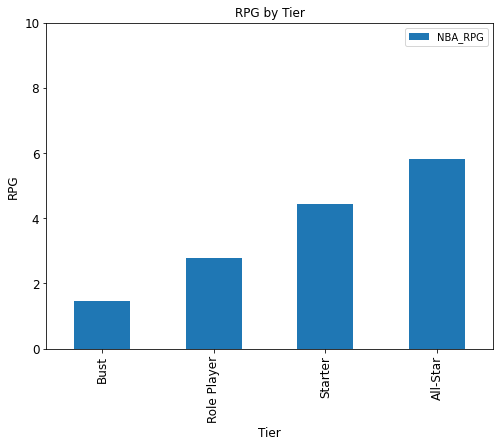

In [11]:
#visualizaiton of rpg by tier category
ax = category_df[['NBA_RPG']].reindex(["Bust", "Role Player", "Starter", "All-Star"]).plot(kind='bar', title ="RPG by Tier", figsize=(8, 6), fontsize=12)
ax.set_xlabel("Tier", fontsize=12)
ax.set_ylabel("RPG", fontsize=12)
ax.set_ylim([0, 10])
plt.show()

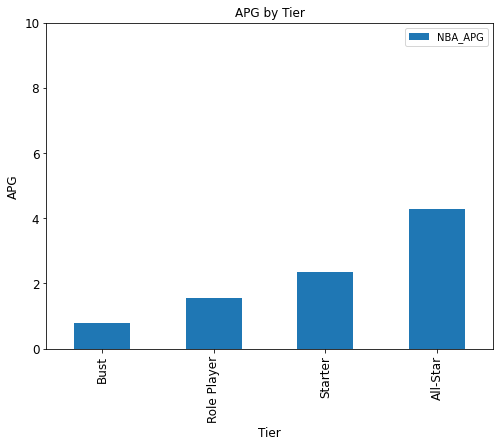

In [12]:
#visualization of apg by tier category
ax = category_df[['NBA_APG']].reindex(["Bust", "Role Player", "Starter", "All-Star"]).plot(kind='bar', title ="APG by Tier", figsize=(8, 6), fontsize=12)
ax.set_xlabel("Tier", fontsize=12)
ax.set_ylabel("APG", fontsize=12)
ax.set_ylim([0, 10])
plt.show()

In [13]:
#pivot table to create multiple bar chart w/ ppg, rpg, and apg for each tier
df_pivot = df[['NBA_PPG','NBA_RPG','NBA_APG']].groupby(df['Tier_Cat']).mean()
df_pivot

,NBA_PPG,NBA_RPG,NBA_APG
Tier_Cat,,,
All-Star,17.706250,5.823750,4.276250
Bust,3.162500,1.452961,0.788158
Role Player,6.761067,2.784267,1.541333
Starter,10.680709,4.433858,2.338583


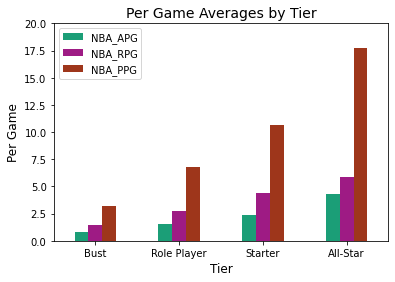

In [14]:
#bar chart w/ ppg, rpg, and apg for each tier
ax = df_pivot.reindex(["Bust", "Role Player", "Starter", "All-Star"]).plot(y=["NBA_APG", "NBA_RPG", "NBA_PPG"], kind='bar',color = ['#1b9e77', '#9e1b84', '#9e361b'])
ax.set_title("Per Game Averages by Tier", fontsize=14)
ax.set_xlabel("Tier", fontsize=12)
ax.set_ylabel("Per Game", fontsize=12)
ax.set_ylim([0, 20])
ax.set_xticklabels(["Bust", "Role Player", "Starter", "All-Star"], rotation=0)
plt.show()

In [15]:
#correlation every column has with Tier
df[df.columns[1:]].corr()['Tier'][:]

StartYear       -0.052678
EndYear          0.287177
NBA_Tenure       0.691806
Ht               0.044215
Wt               0.075232
All_Star_apps    0.532839
All_NBA_apps     0.362530
All_Def_apps     0.244577
NBA_GP           0.715740
NBA_PPG          0.811036
NBA_RPG          0.676722
NBA_APG          0.571080
NBA_FG%          0.438114
NBA_3pt%         0.272788
NBA_FT%          0.316626
NBA_PER          0.693725
NBA_WS           0.736622
Yrs_College     -0.218832
NCAA_GP          0.103660
NCAA_MPG         0.020319
NCAA_FGM         0.149556
NCAA_FGA         0.066279
NCAA_FG%         0.197073
NCAA_2ptM        0.177854
NCAA_2ptA        0.122778
2P%              0.219317
NCAA_3ptM       -0.061464
NCAA_3ptA       -0.059886
NCAA_3pt%        0.035084
NCAA_FTM         0.140438
NCAA_FTA         0.150158
NCAA_FT%        -0.010996
NCAA_RPG         0.165876
NCAA_APG         0.040820
NCAA_SPG         0.118658
NCAA_BPG         0.143517
NCAA_TOPG        0.035364
NCAA_PPG         0.137041
NCAA_SOS    

### Hypothesis Test - Does Players from Big Conferences in College have a higher PER than players from Small Conferences?

In [16]:
#Hypothesis Test
#Null - PER of players in Big Conference = PER of players in Small Conference
#Alternate - PER of players in Big conference /= PER of players in Small Conference

In [17]:
per_df = df.groupby('Conference').NBA_PER

In [18]:
per_df.describe()

,count,mean,std,min,25%,50%,75%,max
Conference,,,,,,,,
0,334.0,12.197904,5.527428,-22.1,9.8,12.05,14.6,66.8
1,679.0,12.338439,4.569007,-18.4,10.2,12.60,14.9,27.4


In [19]:
top = 12.34 - 12.2

In [20]:
bottom = (((12.34 * 12.34)/679) + ((12.2 * 12.2)/334))**.5

In [21]:
t = top/bottom
t

0.1710508493766349

In [22]:
from scipy import stats

In [23]:
t_crit = np.round(stats.t.ppf(1 - .05, df = 1676), 3)
t_crit

1.646

Can not reject the null hypothesis. The NBA PER of Players from colleges in Big Conferences is not higher than the NBA PER of players from colleges in Smaller Conferences. 

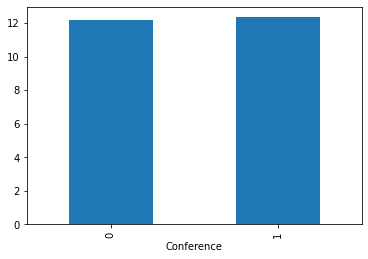

In [24]:
df['NBA_PER'].groupby(df['Conference']).mean().plot(kind='bar')


# Modeling

In [25]:
from scipy.stats.stats import pearsonr
import scipy as sp
from scipy import stats
from scipy.stats import skew,norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn')
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

In [26]:
#Create new df with just available info when each player was drafted
draft_profile_df = df[['Yrs_College','NCAA_GP', 'NCAA_MPG', 'NCAA_FGM', 'NCAA_FG%', 'NCAA_3ptM', 'NCAA_3pt%',
                       'NCAA_FTM', 'NCAA_FTA', 'NCAA_FT%', 'NCAA_RPG', 'NCAA_APG', 'NCAA_SPG', 'NCAA_BPG',
                       'NCAA_TOPG', 'NCAA_PPG', 'NCAA_SOS', 'Tier', 'Undersized', 'Conference']]

In [27]:
target = draft_profile_df['Tier']
features = draft_profile_df.drop(['Tier'], axis=1)

In [28]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.20)

In [29]:
scaler = StandardScaler()
# fit the scaler to the training data
scaler.fit(X_train)
#transform the training data
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
#transform the testing dat
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

### Dummy Classifier (Baseline Model)

In [30]:
from sklearn.dummy import DummyClassifier

In [31]:
#create dummy classifier baseline model
dummy = DummyClassifier(strategy='stratified', random_state=1)

In [32]:
dummy.fit(X_train, y_train)

dummy_preds = dummy.predict(X_test)
dummy_preds_train = dummy.predict(X_train)

dummy_f1 = metrics.f1_score(y_test, dummy_preds, average='weighted')
dummy_f1_train = metrics.f1_score(y_train, dummy_preds_train, average='weighted')

dummy_acc = metrics.accuracy_score(y_test, dummy_preds)
dummy_acc_train = metrics.accuracy_score(y_train, dummy_preds_train)

dummy_precision = metrics.precision_score(y_test, dummy_preds, average='weighted')
dummy_precision_train = metrics.precision_score(y_train, dummy_preds_train, average='weighted')


print('Train Accuracy score: ', dummy_acc_train)
print('Train F1 score: ', dummy_f1_train)
print('Train Precision score: ', dummy_precision_train)
print('Test Accuracy score: ', dummy_acc)
print('Test F1 score: ', dummy_f1)
print('Test Precision score: ', dummy_precision)

Train Accuracy score:  0.2716049382716049
Train F1 score:  0.2725523414121206
Train Precision score:  0.273652149212436
Test Accuracy score:  0.28078817733990147
Test F1 score:  0.28672825201988666
Test Precision score:  0.29668689782463065


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
#fumction to find the position of the maximum value in a list
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [35]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 15))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    
    k_scores.append(acc)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores)
    
print(idx, val)

9 0.4482758620689655


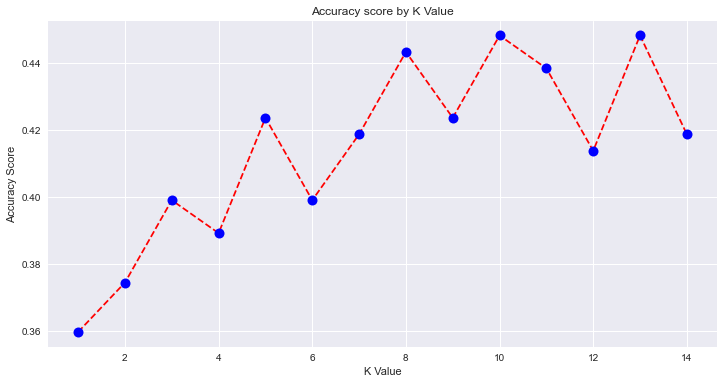

In [36]:
#Plot different Ks by accuracy score
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)

In [38]:
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)
knn_preds_train = knn.predict(X_train)

knn_f1 = metrics.f1_score(y_test, knn_preds, average='weighted')
knn_f1_train = metrics.f1_score(y_train, knn_preds_train, average='weighted')

knn_acc = metrics.accuracy_score(y_test, knn_preds)
knn_acc_train = metrics.accuracy_score(y_train, knn_preds_train)

knn_precision = metrics.precision_score(y_test, knn_preds, average='weighted')
knn_precision_train = metrics.precision_score(y_train, knn_preds_train, average='weighted')


print('Train Accuracy score: ', knn_acc_train)
print('Train F1 score: ', knn_f1_train)
print('Train Precision score: ', knn_precision_train)
print('Test Accuracy score: ', knn_acc)
print('Test F1 score: ', knn_f1)
print('Test Precision score: ', knn_precision)

Train Accuracy score:  0.5246913580246914
Train F1 score:  0.49802995904658987
Train Precision score:  0.5018195776998613
Test Accuracy score:  0.4482758620689655
Test F1 score:  0.42953078413576024
Test Precision score:  0.4341172671391798


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The KNN model with a nearest neighbors of 10 has an F1 score of .430, an Accuracy score of .448 and a Precision sscore of .434. The model does not appear to be overfitting. 

### Logistic Regression

In [39]:
lr = LogisticRegression(class_weight='balanced')

In [40]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [41]:
lr_preds = lr.predict(X_test)
lr_preds_train = lr.predict(X_train)

lr_f1 = metrics.f1_score(y_test, lr_preds, average='weighted')
lr_f1_train = metrics.f1_score(y_train, lr_preds_train, average='weighted')

lr_acc = metrics.accuracy_score(y_test, lr_preds)
lr_acc_train = metrics.accuracy_score(y_train, lr_preds_train)

lr_precision = metrics.precision_score(y_test, lr_preds, average='weighted')
lr_precision_train = metrics.precision_score(y_train, lr_preds_train, average='weighted')

print('Train Accuracy Score: ', lr_acc_train)
print('Train F1 score : ', lr_f1_train)
print('Train Precision score : ', lr_precision_train)
print('Test Accuracy score: ', lr_acc)
print('Test F1 score: ', lr_f1)
print('Test Precision score : ', lr_precision)

Train Accuracy Score:  0.408641975308642
Train F1 score :  0.40926507629197184
Train Precision score :  0.45849495554687636
Test Accuracy score:  0.43349753694581283
Test F1 score:  0.4393526694681426
Test Precision score :  0.48710290650296256


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
print(metrics.confusion_matrix(y_test, lr_preds))

[[40 16  5  4]
 [29 22  9 16]
 [ 9  6 20 15]
 [ 3  0  3  6]]


In [44]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr_preds)
classes = ['Bust', 'Role Player', 'Starter', 'All-Star']

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.61538462 0.24615385 0.07692308 0.06153846]
 [0.38157895 0.28947368 0.11842105 0.21052632]
 [0.18       0.12       0.4        0.3       ]
 [0.25       0.         0.25       0.5       ]]


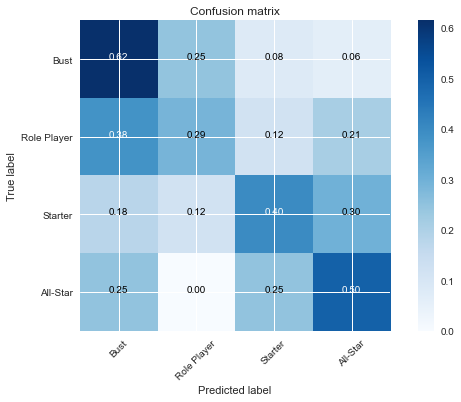

In [46]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

The Logistic Regression model has an F1 score of .439, an Accuracy score of .433 and a Precision score of .487. The model does not appear to be overfitting. According to the confusion matrix, the model does a better job of correctly classifying "All-Star" and "Bust" than it does for the other categories. The model does not do a good job of correctly classifying role players. 

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
clf = DecisionTreeClassifier(max_depth=11)
clf.fit(X_train, y_train)

clf_preds  = clf.predict(X_test)
clf_preds_train = clf.predict(X_train)

clf_f1 = metrics.f1_score(y_test, clf_preds, average='weighted')
clf_f1_train = metrics.f1_score(y_train, clf_preds_train, average='weighted')

clf_acc = metrics.accuracy_score(y_test, clf_preds)
clf_acc_train = metrics.accuracy_score(y_train, clf_preds_train)

clf_precision = metrics.precision_score(y_test, clf_preds, average='weighted')
clf_precision_train = metrics.precision_score(y_train, clf_preds_train, average='weighted')

print('Train F1 score: ', clf_f1_train)
print('Train Accuracy score: ', clf_acc_train)
print('Train Precision score: ', clf_precision_train)
print('Test F1 score: ', clf_f1)
print('Test Accuracy score: ', clf_acc)
print('Test Precision score: ', clf_precision)

Train F1 score:  0.8612223303984823
Train Accuracy score:  0.8617283950617284
Train Precision score:  0.8680716331653782
Test F1 score:  0.3349519443506143
Test Accuracy score:  0.3399014778325123
Test Precision score:  0.33304390104960696


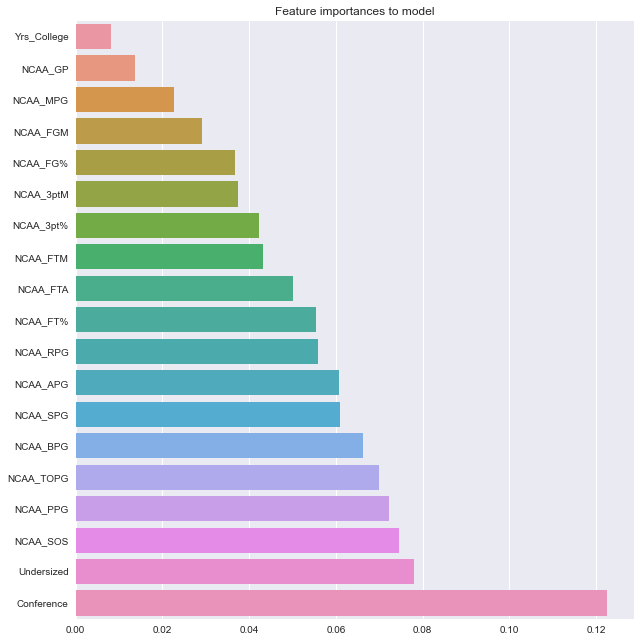

In [49]:
def plot_feature_importances(model):  #wanted to see most important features in the model
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

features, ax = plt.subplots(figsize=(10,11))
sns.barplot( y=X_train.columns.values[-25: ], x=np.sort(clf.feature_importances_)[-25:], orient='h')
ax.set(title='Feature importances to model')
features.savefig('best_features.png', bbox_inches='tight');

#### GridsearchCV - Decision Tree

In [50]:
# Import Grid search
from sklearn.model_selection import GridSearchCV

In [51]:
# creating our parameters to test
# Parameters dictionary that will loop over a range of 1-20 for 'max_depth', choose between gini and entropy and choose best percent of max features
parameters={'max_depth': range(1,21,1), 
            'criterion': ['entropy', 'gini'], 
            'max_features': [0.25, 0.5, 0.75],
           'min_samples_split': [0.25, 0.5, 0.75],
           'min_samples_leaf': [1, 5, 10, 25]}

In [52]:
#create our estimaor
dtc = DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(dtc, parameters, cv=5, scoring='f1_weighted',n_jobs=-1,verbose=1)

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 6380 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:   33.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 21),
                         'max_features': [0.25, 0.5, 0.75],
                         'min_samples_leaf': [1, 5, 10, 25],
                         'min_samples_split': [0.25, 0.5, 0.75]},
             scoring='f1_weighted', verbose=1)

In [53]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.3624285534240371
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.75, 'min_samples_leaf': 5, 'min_samples_split': 0.25}
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=0.75,
                       min_samples_leaf=5, min_samples_split=0.25,
                       random_state=1)


In [54]:
clf = DecisionTreeClassifier(max_depth=15, criterion='entropy', max_features=.75, min_samples_leaf=5, min_samples_split=.25)
clf.fit(X_train, y_train)

clf_preds  = clf.predict(X_test)
clf_preds_train = clf.predict(X_train)

clf_f1 = metrics.f1_score(y_test, clf_preds, average='weighted')
clf_f1_train = metrics.f1_score(y_train, clf_preds_train, average='weighted')

clf_acc = metrics.accuracy_score(y_test, clf_preds)
clf_acc_train = metrics.accuracy_score(y_train, clf_preds_train)

clf_precision = metrics.precision_score(y_test, clf_preds, average='weighted')
clf_precision_train = metrics.precision_score(y_train, clf_preds_train, average='weighted')

print('Train F1 score: ', clf_f1_train)
print('Train Accuracy score: ', clf_acc_train)
print('Train Precision score: ', clf_precision_train)
print('Test F1 score: ', clf_f1)
print('Test Accuracy score: ', clf_acc)
print('Test Precision score: ', clf_precision)

Train F1 score:  0.40915631318881396
Train Accuracy score:  0.42345679012345677
Train Precision score:  0.4445470263977017
Test F1 score:  0.304323710324606
Test Accuracy score:  0.32019704433497537
Test Precision score:  0.29801767378362354


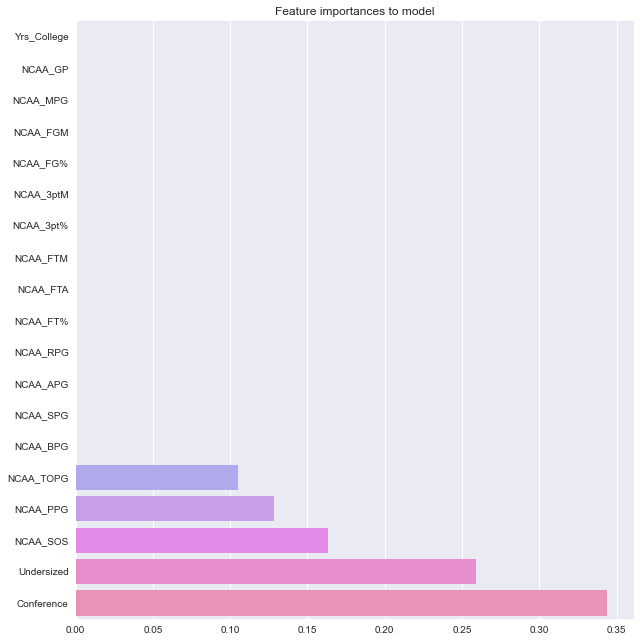

In [55]:
def plot_feature_importances(model):  #wanted to see most important features in the model
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

features, ax = plt.subplots(figsize=(10,11))
sns.barplot( y=X_train.columns.values[-25: ], x=np.sort(clf.feature_importances_)[-25:], orient='h')
ax.set(title='Feature importances to model')
features.savefig('best_features.png', bbox_inches='tight');

The first Decision Tree model that was run only had one hyperparameter (max depth=11). The model ended up overfitting and had relatively low F1, Accuracy and Precision scores. The second Decision Tree model had the following hyperparameters tuned using GridSearch: Max Depth, Criterion, Max Features, Minimum Samples Split, and Minimum Samples Leaf. The model had low scores (F1 score= .304, Accuracy score= .320, Precision Score= .298), but was not overfitting by as much as the first Decision Tree model. 

### Random Forest

In [56]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(random_state = 1, class_weight='balanced')

rfc.fit(X_train, y_train)

rfc_preds  = rfc.predict(X_test)
rfc_preds_train = rfc.predict(X_train)

rfc_f1 = metrics.f1_score(y_test, rfc_preds, average='weighted')
rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train, average='weighted')

rfc_acc = metrics.accuracy_score(y_test, rfc_preds)
rfc_acc_train = metrics.accuracy_score(y_train, rfc_preds_train)

rfc_precision = metrics.precision_score(y_test, rfc_preds, average='weighted')
rfc_precision_train = metrics.precision_score(y_train, rfc_preds_train, average='weighted')

print('Train F1 score: ', rfc_f1_train)
print('Train Accuracy score: ', rfc_acc_train)
print('Train Precision score:', rfc_precision_train)
print('Test F1 score: ', rfc_f1)
print('Test Accuracy score: ', rfc_acc)
print('Test Precision score: ', rfc_precision)

Train F1 score:  0.9889365981032647
Train Accuracy score:  0.9888888888888889
Train Precision score: 0.9892183739391449
Test F1 score:  0.39545521141654894
Test Accuracy score:  0.4187192118226601
Test Precision score:  0.4001521747128524


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Random Forest model has an F1 score of .395, an Accuracy score of .419 and a Precision score of .400. The model appears to be overfitting.

### Voting Classifier

In [58]:
from sklearn.ensemble import VotingClassifier


In [59]:
voting_clf = VotingClassifier(
                estimators=[('knneighbors', knn), ('logreg', lr), ('decisiontree', clf)], 
                voting='soft')

voting_clf.fit(X_train, y_train)

vc_preds = voting_clf.predict(X_test)
vc_preds_train = voting_clf.predict(X_train)

vc_f1 = metrics.f1_score(y_test, vc_preds, average='weighted')
vc_f1_train = metrics.f1_score(y_train, vc_preds_train, average='weighted')

vc_acc = metrics.accuracy_score(y_test, vc_preds)
vc_acc_train = metrics.accuracy_score(y_train, vc_preds_train)

vc_precision = metrics.precision_score(y_test, vc_preds, average='weighted')
vc_precision_train = metrics.precision_score(y_train, vc_preds_train, average='weighted')

print('Train F1 score: ', vc_f1_train)
print('Train Accuracy score: ', vc_acc_train)
print('Train Precision score: ', vc_precision_train)
print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)
print('Test Precision score: ', vc_precision)

Train F1 score:  0.5519998574546763
Train Accuracy score:  0.5604938271604938
Train Precision score:  0.5589017139151188
Test F1 score:  0.46444236627053437
Test Accuracy score:  0.47783251231527096
Test Precision score:  0.4716850381484637


The Voting Classifier model is built with the knn, logistic regression and decision tree models. The voting is set to soft to get the average of the 3 models. The Voting Classifier model has an F1 score of .464, an Accuracy score of .478 and a Precision score of .472. The model does not appear to be overfitting by much.

### XGBoost

In [60]:
#conda install -c anaconda py-xgboost

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier

In [62]:
features = draft_profile_df['Tier']
target = draft_profile_df.drop(columns='Tier')

scaler = StandardScaler()
scaled_df = scaler.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(scaled_df, features)

In [63]:
parameters = {
    "learning_rate": [0.1, 0.05],
    'max_depth': [5, 10, 15],
    'min_child_weight': [5, 10],
    'subsample': [0.5, 0.7],
    'n_estimators': [100,200,300,400]}

In [64]:
clf = xgb.XGBClassifier()
grid_clf = GridSearchCV(clf, parameters, scoring='f1_weighted', cv=5, n_jobs=-1,verbose=1)
grid_clf.fit(scaled_df, features)
best_parameters = grid_clf.best_params_
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  7.8min finished


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 15
min_child_weight: 10
n_estimators: 100
subsample: 0.5


In [65]:
xgb_preds_train = grid_clf.predict(X_train)
xgb_preds = grid_clf.predict(X_test)

xgb_acc_train = accuracy_score(y_train, xgb_preds_train)
xgb_acc = accuracy_score(y_test, xgb_preds)

xgb_f1_train= f1_score(y_train, xgb_preds_train, average='weighted')
xgb_f1 = f1_score(y_test, xgb_preds, average='weighted')

xgb_precision = metrics.precision_score(y_test, xgb_preds, average='weighted')
xgb_precision_train = metrics.precision_score(y_train, xgb_preds_train, average='weighted')


print("Train F1 Score:", xgb_f1_train)
print("Train Accuracy Score:", xgb_acc_train)
print("Train Precision Score:", xgb_precision_train)
print("Test F1 Score:", xgb_f1)
print("Test Accuracy Score:", xgb_acc)
print("Test Precision Score:", xgb_precision)


Train F1 Score: 0.8785909154502114
Train Accuracy Score: 0.8853754940711462
Train Precision Score: 0.8865591363834509
Test F1 Score: 0.9024065097251702
Test Accuracy Score: 0.9094488188976378
Test Precision Score: 0.9138799976708765


In [66]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,xgb_preds)
classes = ['Bust', 'Role Player', 'Starter', 'All-Star']

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[81  3  1  0]
 [ 1 83  2  0]
 [ 4  3 62  0]
 [ 1  6  2  5]]


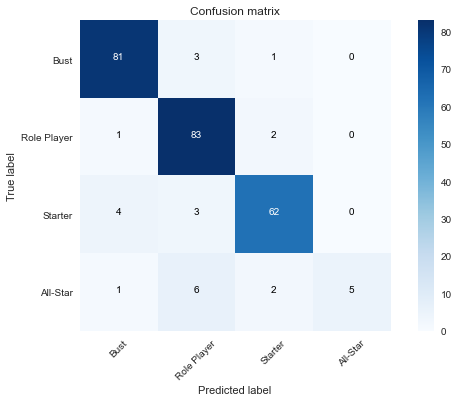

In [68]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [69]:
grid_clf.best_estimator_.feature_importances_

array([0.06676051, 0.05522087, 0.04703382, 0.0505354 , 0.05717628,
       0.0501067 , 0.04628419, 0.05367117, 0.04856215, 0.05004896,
       0.0546551 , 0.05083807, 0.05423775, 0.04962764, 0.04952623,
       0.05275062, 0.05354469, 0.05909968, 0.05032017], dtype=float32)

Feature: 0, Score: 0.06676
Feature: 1, Score: 0.05522
Feature: 2, Score: 0.04703
Feature: 3, Score: 0.05054
Feature: 4, Score: 0.05718
Feature: 5, Score: 0.05011
Feature: 6, Score: 0.04628
Feature: 7, Score: 0.05367
Feature: 8, Score: 0.04856
Feature: 9, Score: 0.05005
Feature: 10, Score: 0.05466
Feature: 11, Score: 0.05084
Feature: 12, Score: 0.05424
Feature: 13, Score: 0.04963
Feature: 14, Score: 0.04953
Feature: 15, Score: 0.05275
Feature: 16, Score: 0.05354
Feature: 17, Score: 0.05910
Feature: 18, Score: 0.05032


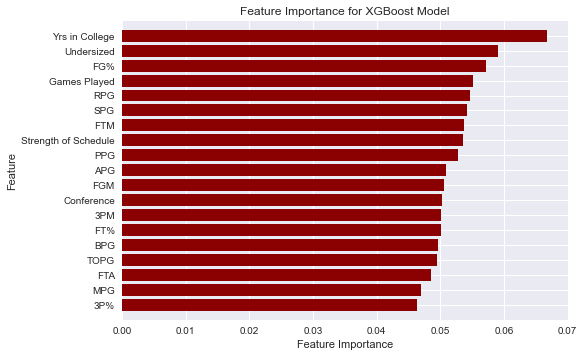

In [144]:
importance = grid_clf.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importances
indices = np.argsort(importances)[::1]
plt.barh(range(scaled_df.shape[1]), importances[indices], color='darkred')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for XGBoost Model')
plt.ylim(-1, 19)
yticks = ['3P%', 'MPG', 'FTA', 'TOPG', 'BPG', 'FT%', '3PM', 'Conference', 'FGM', 'APG', 'PPG', 'Strength of Schedule',
         'FTM', 'SPG', 'RPG', 'Games Played', 'FG%', 'Undersized', 'Yrs in College']
plt.yticks(range(scaled_df.shape[1]), yticks, fontsize = 10)
plt.show()

In [71]:
#feature_names = ['Yrs_College','NCAA_GP', 'NCAA_MPG', 'NCAA_FGM', 'NCAA_FG%', 'NCAA_3ptM', 'NCAA_3pt%',
#                       'NCAA_FTM', 'NCAA_FTA', 'NCAA_FT%', 'NCAA_RPG', 'NCAA_APG', 'NCAA_SPG', 'NCAA_BPG',
#                       'NCAA_TOPG', 'NCAA_PPG', 'NCAA_SOS', 'Undersized', 'Conference']

For the XGBoost model, I used GridSearch to tune the following hyperparameters: learning rate, max depth, min child weight, n estimators, and subsample. After tuning these hyperparameters, the XGBoost model had an F1 score of .902, an Accuracy score of .909 and a Precision Score of .914. The model did not appear to be overfitting. Based on the Confusion Matrix for the XGBoost model, the model does a really good job at correctly classifying "Bust", "Role Player" and "Starter". The model is not as good at predicting "All Star", but the Precision for "All Star" is very high which means that the majority of players that get classified as "All-Star" end up becoming an All-Star 


# Testing Model on 2018 Draft Class

Tested XGBoost model on 2018 Draft Class to determine how well the model performs. Used knowledge of NBA and its players to evaluate how well the model performed. 

In [85]:
df_2018_rookies = pd.read_csv('df_2018_rookies.csv')

In [86]:
df_2018_rookies.head()

,Unnamed: 0,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS
0,41,Grayson Allen,2019.0,2020.0,G,2.0,193cm,89kg,1995-10-08,0.0,0.0,0.0,76.0,7.1,1.4,1.0,42.9,37.1,80.0,10.3,1.2,4.0,Duke,ACC,37.0,35.6,4.9,11.7,0.418,2.1,4.2,0.503,2.8,7.5,0.370,2.9,3.4,0.850,3.3,4.6,1.7,0.1,2.1,15.5,9.71
1,86,Kostas Antetokounmpo,2019.0,2020.0,F,2.0,208cm,90kg,1997-11-20,0.0,0.0,0.0,7.0,1.3,0.6,0.3,50.0,0.0,50.0,10.2,0.0,1.0,Dayton,A-10,29.0,15.1,2.0,3.5,0.574,1.9,3.0,0.651,0.1,0.5,0.133,1.1,2.2,0.516,2.9,0.4,0.2,1.1,1.3,5.2,2.70
2,120,Deandre Ayton,2019.0,2020.0,C,2.0,211cm,113kg,1998-07-23,0.0,0.0,0.0,109.0,17.0,10.7,1.8,57.0,17.6,74.8,20.3,9.0,1.0,Arizona,Pac-12,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,11.6,1.6,0.6,1.9,2.0,20.1,6.84
3,142,Mohamed Bamba,2019.0,2020.0,C,2.0,213cm,104kg,1998-05-12,0.0,0.0,0.0,109.0,5.7,4.9,0.7,47.1,32.8,62.4,16.3,4.2,1.0,Texas,Big 12,30.0,30.2,4.9,9.0,0.541,4.4,7.3,0.603,0.5,1.7,0.275,2.7,4.0,0.681,10.5,0.5,0.8,3.7,1.5,12.9,10.67
4,167,Keita Bates-Diop,2019.0,2020.0,F,2.0,203cm,103kg,1996-01-23,0.0,0.0,0.0,74.0,5.9,2.8,0.6,42.6,30.3,69.9,11.3,1.5,4.0,Ohio State,Big Ten,34.0,33.1,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,0.359,3.3,4.1,0.794,8.7,1.6,0.9,1.6,1.8,19.8,9.03


In [87]:
df_2018_rookies.shape

(45, 45)

In [88]:
#remove 'cm' and 'kg' from Ht and Wt columns. Convert ht and wt to inches and lbs respectively
df_2018_rookies['Ht'] = df_2018_rookies['Ht'].map(lambda x: x.rstrip('cm'))
df_2018_rookies['Wt'] = df_2018_rookies['Wt'].map(lambda x: x.rstrip('kg'))
df_2018_rookies['Ht'] = df_2018_rookies['Ht'].astype(int)
df_2018_rookies['Wt'] = df_2018_rookies['Wt'].astype(float)
df_2018_rookies['Ht'] = df_2018_rookies['Ht'] * 0.393701
df_2018_rookies['Wt'] = df_2018_rookies['Wt'] * 2.20462

In [89]:
#Create the column for undersized players
# create a list of our conditions
conditions = [
    (df_2018_rookies['Ht'] < 74) & (df_2018_rookies['Position'] == 'G'),
    (df_2018_rookies['Ht'] < 77) & (df_2018_rookies['Position'] == 'GF'),
    (df_2018_rookies['Ht'] < 78) & (df_2018_rookies['Position'] == 'FG'),
    (df_2018_rookies['Ht'] < 79) & (df_2018_rookies['Position'] == 'F'),
    (df_2018_rookies['Ht'] < 81) & (df_2018_rookies['Position'] == 'FC'),
    (df_2018_rookies['Ht'] < 82) & (df_2018_rookies['Position'] == 'CF'),
    (df_2018_rookies['Ht'] < 82) & (df_2018_rookies['Position'] == 'C'),
    (df_2018_rookies['Ht'] >= 74) & (df_2018_rookies['Position'] == 'G'),
    (df_2018_rookies['Ht'] >= 77) & (df_2018_rookies['Position'] == 'GF'),
    (df_2018_rookies['Ht'] >= 78) & (df_2018_rookies['Position'] == 'FG'),
    (df_2018_rookies['Ht'] >= 79) & (df_2018_rookies['Position'] == 'F'),
    (df_2018_rookies['Ht'] >= 81) & (df_2018_rookies['Position'] == 'FC'),
    (df_2018_rookies['Ht'] >= 82) & (df_2018_rookies['Position'] == 'CF'),
    (df_2018_rookies['Ht'] >= 82) & (df_2018_rookies['Position'] == 'C')
    ]

# create a list of the values we want to assign for each condition
values = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_2018_rookies['Undersized'] = np.select(conditions, values)


In [90]:
#Create the column for players in Big 5 NCAA Conferences (plus Big East)
# create a list of our conditions
conditions = [
    (df_2018_rookies['Conf'] == 'ACC'),
    (df_2018_rookies['Conf'] == 'Big East'),
    (df_2018_rookies['Conf'] == 'Big Ten'),
    (df_2018_rookies['Conf'] == 'Big 12'),
    (df_2018_rookies['Conf'] == 'Pac-10'),
    (df_2018_rookies['Conf'] == 'SEC')
    ]

# create a list of the values we want to assign for each condition
values = [1, 1, 1, 1, 1, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df_2018_rookies['Conference'] = np.select(conditions, values)


In [91]:
#Create new df with just available info when each player was drafted
draft_profile_df = df_2018_rookies[['Yrs_College','NCAA_GP', 'NCAA_MPG', 'NCAA_FGM', 'NCAA_FG%', 'NCAA_3ptM', 'NCAA_3pt%',
                       'NCAA_FTM', 'NCAA_FTA', 'NCAA_FT%', 'NCAA_RPG', 'NCAA_APG', 'NCAA_SPG', 'NCAA_BPG',
                       'NCAA_TOPG', 'NCAA_PPG', 'NCAA_SOS', 'Undersized', 'Conference']]

In [92]:
draft_profile_df.columns =['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13',
                          'f14', 'f15', 'f16', 'f17', 'f18'] 


In [93]:
scaled_df = pd.DataFrame(data = scaler.transform(draft_profile_df), columns = draft_profile_df.columns)

In [94]:
grid_clf.predict(scaled_df)

array([0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 3, 1, 2, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       3])

In [95]:
df_2018_rookies.head(45)

,Unnamed: 0,Player,StartYear,EndYear,Position,NBA_Tenure,Ht,Wt,Birthday,All_Star_apps,All_NBA_apps,All_Def_apps,NBA_GP,NBA_PPG,NBA_RPG,NBA_APG,NBA_FG%,NBA_3pt%,NBA_FT%,NBA_PER,NBA_WS,Yrs_College,School,Conf,NCAA_GP,NCAA_MPG,NCAA_FGM,NCAA_FGA,NCAA_FG%,NCAA_2ptM,NCAA_2ptA,2P%,NCAA_3ptM,NCAA_3ptA,NCAA_3pt%,NCAA_FTM,NCAA_FTA,NCAA_FT%,NCAA_RPG,NCAA_APG,NCAA_SPG,NCAA_BPG,NCAA_TOPG,NCAA_PPG,NCAA_SOS,Undersized,Conference
0,41,Grayson Allen,2019.0,2020.0,G,2.0,75.984293,196.21118,1995-10-08,0.0,0.0,0.0,76.0,7.1,1.4,1.0,42.9,37.1,80.0,10.3,1.2,4.0,Duke,ACC,37.0,35.6,4.9,11.7,0.418,2.1,4.2,0.503,2.8,7.5,0.370,2.9,3.4,0.850,3.3,4.6,1.7,0.1,2.1,15.5,9.71,0,1
1,86,Kostas Antetokounmpo,2019.0,2020.0,F,2.0,81.889808,198.41580,1997-11-20,0.0,0.0,0.0,7.0,1.3,0.6,0.3,50.0,0.0,50.0,10.2,0.0,1.0,Dayton,A-10,29.0,15.1,2.0,3.5,0.574,1.9,3.0,0.651,0.1,0.5,0.133,1.1,2.2,0.516,2.9,0.4,0.2,1.1,1.3,5.2,2.70,0,0
2,120,Deandre Ayton,2019.0,2020.0,C,2.0,83.070911,249.12206,1998-07-23,0.0,0.0,0.0,109.0,17.0,10.7,1.8,57.0,17.6,74.8,20.3,9.0,1.0,Arizona,Pac-12,35.0,33.5,7.9,12.9,0.612,7.5,11.9,0.635,0.3,1.0,0.343,4.0,5.5,0.733,11.6,1.6,0.6,1.9,2.0,20.1,6.84,0,0
3,142,Mohamed Bamba,2019.0,2020.0,C,2.0,83.858313,229.28048,1998-05-12,0.0,0.0,0.0,109.0,5.7,4.9,0.7,47.1,32.8,62.4,16.3,4.2,1.0,Texas,Big 12,30.0,30.2,4.9,9.0,0.541,4.4,7.3,0.603,0.5,1.7,0.275,2.7,4.0,0.681,10.5,0.5,0.8,3.7,1.5,12.9,10.67,0,1
4,167,Keita Bates-Diop,2019.0,2020.0,F,2.0,79.921303,227.07586,1996-01-23,0.0,0.0,0.0,74.0,5.9,2.8,0.6,42.6,30.3,69.9,11.3,1.5,4.0,Ohio State,Big Ten,34.0,33.1,7.3,15.1,0.480,5.3,9.7,0.547,1.9,5.4,0.359,3.3,4.1,0.794,8.7,1.6,0.9,1.6,1.8,19.8,9.03,0,1
5,243,Jaron Blossomgame,2019.0,2019.0,F,1.0,79.921303,218.25738,1993-09-16,0.0,0.0,0.0,27.0,4.2,3.6,0.5,44.3,25.6,76.9,10.2,0.3,4.0,Clemson,ACC,33.0,34.3,6.7,13.4,0.499,5.9,10.5,0.565,0.7,2.8,0.255,3.6,5.1,0.714,6.3,1.5,0.8,0.9,1.7,17.7,9.98,0,1
6,257,Jonah Bolden,2019.0,2020.0,F,2.0,79.921303,218.25738,1996-01-02,0.0,0.0,0.0,51.0,4.3,3.4,0.8,48.6,34.0,48.4,12.2,1.4,1.0,UCLA,Pac-12,31.0,21.7,1.6,4.0,0.415,1.4,2.8,0.483,0.3,1.2,0.250,1.1,1.5,0.733,4.8,1.1,0.7,0.9,0.8,4.6,9.69,0,0
7,319,Mikal Bridges,2019.0,2020.0,G,2.0,77.952798,207.23428,1996-08-30,0.0,0.0,0.0,155.0,8.7,3.6,1.9,46.7,34.5,82.5,11.8,7.7,3.0,Villanova,Big East,40.0,32.1,6.1,11.9,0.514,3.5,5.9,0.593,2.6,6.0,0.435,2.9,3.4,0.851,5.3,1.9,1.5,1.1,1.4,17.7,10.24,0,1
8,320,Miles Bridges,2019.0,2020.0,GF,2.0,77.952798,224.87124,1998-03-21,0.0,0.0,0.0,145.0,9.9,4.7,1.4,44.0,32.8,78.8,12.6,4.5,2.0,Michigan State,Big Ten,34.0,31.4,6.1,13.4,0.457,4.1,7.7,0.527,2.1,5.7,0.364,2.7,3.2,0.853,7.0,2.7,0.6,0.8,2.0,17.1,7.10,0,1
9,338,Bruce Brown,2019.0,2020.0,G,2.0,75.984293,200.62042,1996-08-15,0.0,0.0,0.0,132.0,6.3,3.5,2.4,42.4,30.2,74.3,9.6,3.6,2.0,Miami (FL),ACC,19.0,33.7,4.1,9.9,0.415,3.3,6.7,0.484,0.8,3.2,0.267,2.3,3.7,0.629,7.1,4.0,1.3,0.8,2.3,11.4,6.96,0,1
